In [1]:
!pip install snowflake-connector-python

In [2]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

## Install DBT using Miniconda 

Installed Miniconda and created a Conda environment named `p4-env`. Installed `dbt`, `snowflake-connector-python`, and other required packages. Verified DBT installation using `!which dbt`.

In [3]:
!which dbt

### dbt Transformation of Survey Table

In [4]:
!grep -v password ~/.dbt/profiles.yml

p4_data_pipeline:
  target: dev
  outputs:
    dev:
      type: snowflake
      account: PXYRLSQ-SZ74217
      user: AWARIA31
      role: P4_ROLE
      database: SURVEY_DATABASE
      warehouse: COMPUTE_WH
      schema: SURVEY_SCHEMA

    stock_db:
      type: snowflake
      account: PXYRLSQ-SZ74217
      user: AWARIA31
      role: P4_ROLE
      database: STOCK_TRACKING_US_STOCK_PRICES_BY_DAY
      warehouse: COMPUTE_WH
      schema: STOCK


In [5]:
!cat ~/p4_data_pipeline/models/survey_schema.yml


version: 2

models:
  - name: survey_transformed
    description: "Transformed survey table with snake_case column names"
    columns:
      - name: email_address
        description: "Respondent's email"
      - name: age
        description: "Respondent's age"
      - name: primary_major
        description: "Primary major"
      - name: secondary_majors
        description: "Additional majors"
      - name: zip_code
        description: "Zip code while attending classes"
      - name: favorite_pizza_topping
        description: "Favorite pizza topping"
      - name: is_runner
        description: "Whether the student is a runner"
      - name: sleep_preference
        description: "Early bird or night owl"
      - name: is_procrastinator
        description: "Do they procrastinate?"
      - name: extra_hour_activity
        description: "How they'd spend an extra hour"
      - name: favorite_hobby
        description: "Their favorite hobby"
      - name: current_standing
        des

In [6]:
!cat ~/p4_data_pipeline/models/staging/transform_survey.sql

{{ config(materialized='view') }}

SELECT
    "TIMESTAMP",
    "EMAIL_ADDRESS" AS email_address,
    "WHAT_IS_YOUR_AGE_" AS age,
    "WHICH_BEST_DESCRIBES_YOUR_PRIMARY_MAJOR_OR_FIELD_OF_STUDY_IF_YOU_HAVE_MORE_THAN_ONE_MAJOR_PLEASE_SPECIFY_OTHER_MAJORS_AS_PART_OF_THE_NEXT_QUESTION_" AS primary_major,
    "IF_YOU_HAVE_SECONDARY_MAJORS_PLEASE_LIST_THEM_HERE_SEPARATED_BY_A_COMMA_" AS secondary_majors,
    "WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_" AS course_selection_factor,
    "WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_" AS zip_code,
    "WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_" AS favorite_pizza_topping,
    "HAVE_YOU_EVER_IN_YOUR_LIFE_HAD_A_PET_" AS had_pet,
    "ARE_YOU_A_RUNNER_CONSIDER_BOTH_RUNNING_ON_TREADMILL_AND_OUTDOORS_" AS is_runner,
    "WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_" AS sleep_preference,
    "DO_YOU_CONSIDER_YOURSELF_A_PROCR

### What is the most popular pizza topping among students?

/tmp/ipykernel_3153306/272731990.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_  TOPPING_COUNT
0                            pepperoni             45
1                            pineapple             22
2                                Other             20
3                              sausage             19
4                             mushroom             17
5                        basil/spinach             12
6                   none (just cheese)             11
7                         green pepper             11
8                       macaroni/pasta              2


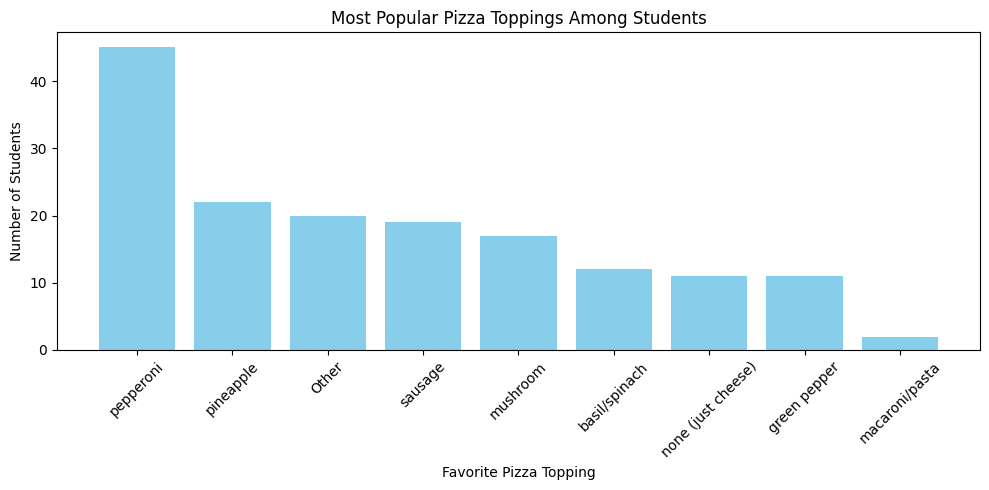

In [7]:
#q10
#Read password from file
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)

query = """
SELECT "WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_", COUNT(*) AS topping_count
FROM SURVEY
GROUP BY "WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_"
ORDER BY topping_count DESC
"""

df = pd.read_sql(query, conn)

print(df)

plt.figure(figsize=(10, 5))
plt.bar(df["WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_"], df["TOPPING_COUNT"], color='skyblue')
plt.xlabel("Favorite Pizza Topping")
plt.ylabel("Number of Students")
plt.title("Most Popular Pizza Toppings Among Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What percentage of students consider themselves procrastinators versus not?

/tmp/ipykernel_3153306/1481174814.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


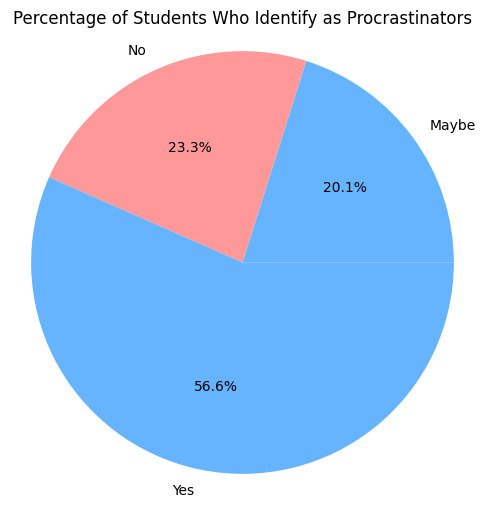

In [8]:
#q11
#Read Snowflake credentials
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)

query = """
SELECT DO_YOU_CONSIDER_YOURSELF_A_PROCRASTINATOR_ AS procrastinate_status,
       COUNT(*) AS student_count
FROM SURVEY
GROUP BY DO_YOU_CONSIDER_YOURSELF_A_PROCRASTINATOR_
"""

df = pd.read_sql(query, conn)
df

plt.figure(figsize=(6, 6))
plt.pie(df["STUDENT_COUNT"], labels=df["PROCRASTINATE_STATUS"], autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"])
plt.title("Percentage of Students Who Identify as Procrastinators")
plt.axis("equal")
plt.show()


### What is the most common course selection factor for each primary major?

In [9]:
#q12
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)
query = """
SELECT WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_ AS factor,
       COUNT(*) AS count
FROM SURVEY
GROUP BY WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_
ORDER BY count DESC
"""
df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/1207257096.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,FACTOR,COUNT
0,Interest in the subject,82
1,Career relevance,41
2,Graduation requirements,24
3,Course workload,6
4,Instructor reputation,6


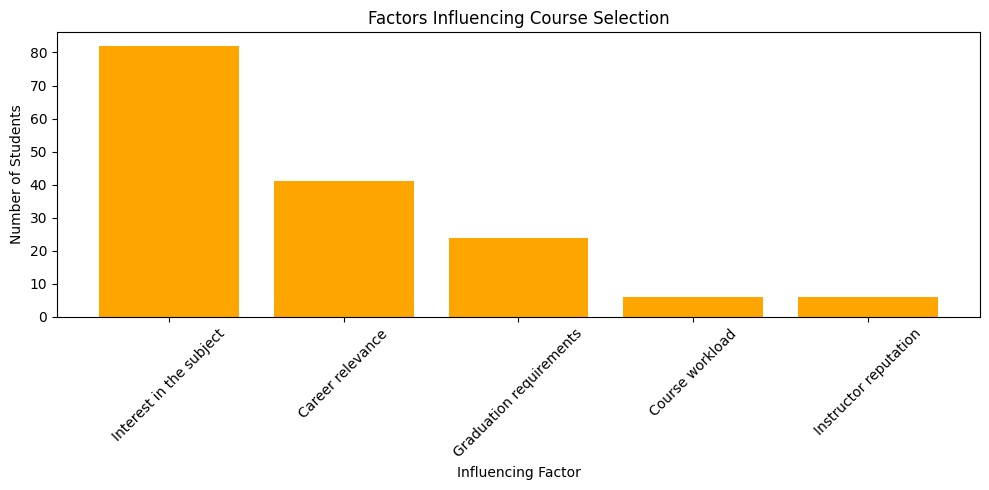

In [10]:
# Plotting the result
plt.figure(figsize=(10, 5))
plt.bar(df["FACTOR"], df["COUNT"], color='orange')
plt.xlabel("Influencing Factor")
plt.ylabel("Number of Students")
plt.title("Factors Influencing Course Selection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Do procrastinators tend to be night owls or early birds?

In [11]:
#q13
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)

query = """
SELECT 
    DO_YOU_CONSIDER_YOURSELF_A_PROCRASTINATOR_ AS is_procrastinator,
    WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_ AS sleep_type,
    COUNT(*) AS student_count
FROM SURVEY
GROUP BY 
    DO_YOU_CONSIDER_YOURSELF_A_PROCRASTINATOR_,
    WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_
ORDER BY student_count DESC
"""
df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/809811074.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,IS_PROCRASTINATOR,SLEEP_TYPE,STUDENT_COUNT
0,Yes,night owl,68
1,No,night owl,17
2,Maybe,night owl,16
3,No,early bird,15
4,Yes,no preference,13
5,Maybe,early bird,9
6,Yes,early bird,9
7,Maybe,no preference,7
8,No,no preference,5


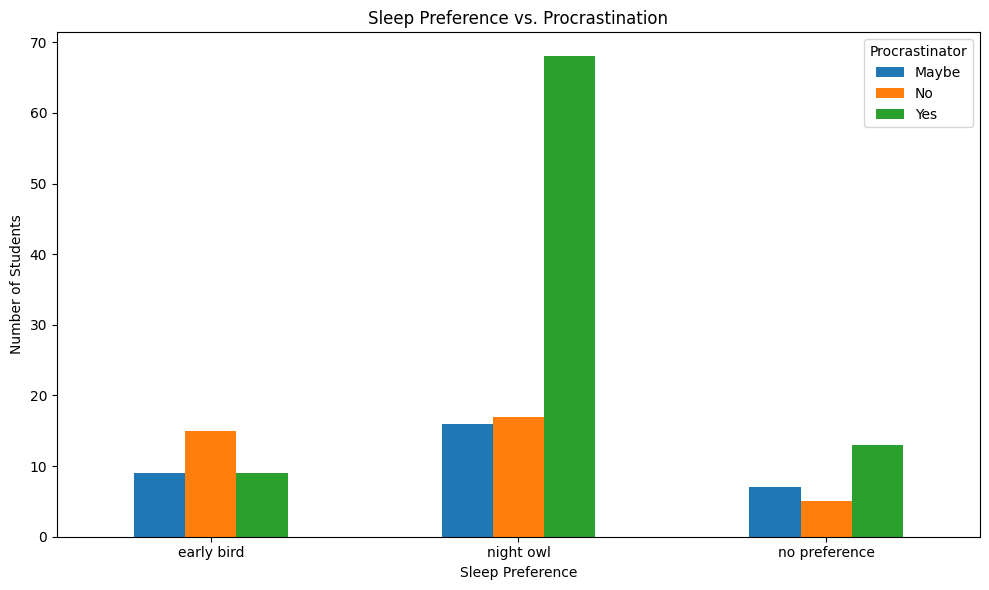

In [12]:
# Pivot the DataFrame
pivot_df = df.pivot(index="SLEEP_TYPE", columns="IS_PROCRASTINATOR", values="STUDENT_COUNT").fillna(0)

# Plotting
pivot_df.plot(kind="bar", figsize=(10, 6))
plt.title("Sleep Preference vs. Procrastination")
plt.xlabel("Sleep Preference")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(title="Procrastinator")
plt.tight_layout()
plt.show()


### What is the distribution of students' current academic standing (e.g., Freshman, Sophomore, etc.)?

In [13]:
#q14
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)
query = """
SELECT WHAT_IS_YOUR_CURRENT_STANDING AS current_standing, COUNT(*) AS count
FROM SURVEY
GROUP BY WHAT_IS_YOUR_CURRENT_STANDING
ORDER BY count DESC
"""
df = pd.read_sql(query, conn)
df


/tmp/ipykernel_3153306/104676236.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,CURRENT_STANDING,COUNT
0,Senior,67
1,Junior,50
2,Sophomore,23
3,Grad,19


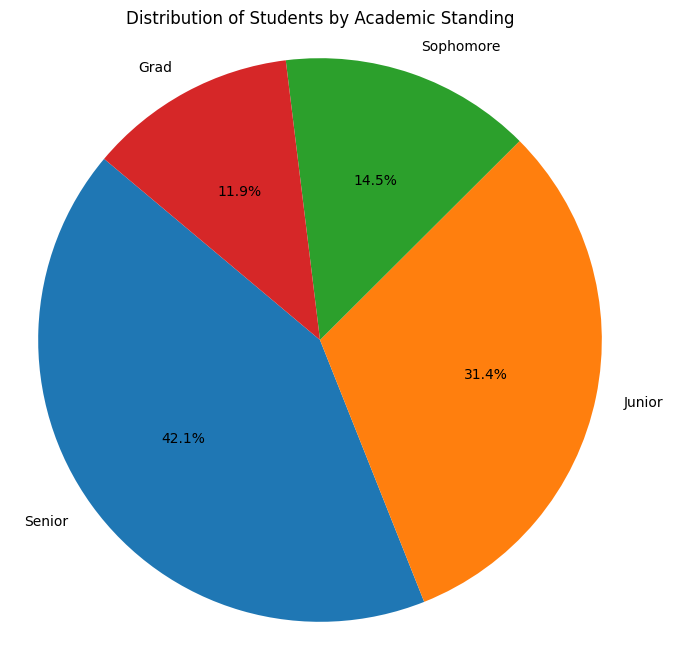

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(df["COUNT"], labels=df["CURRENT_STANDING"], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Students by Academic Standing")
plt.axis('equal')
plt.show()

### What is the most common favorite hobby among students?

In [15]:
#q15
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)
query = """
SELECT WHAT_IS_YOUR_FAVORITE_HOBBY_ AS hobby, COUNT(*) AS count
FROM SURVEY
GROUP BY WHAT_IS_YOUR_FAVORITE_HOBBY_
ORDER BY count DESC
"""
df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/2037337770.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,HOBBY,COUNT
0,Reading,6
1,Guitar,4
2,basketball,4
3,Drawing,3
4,Basketball,3
...,...,...
111,hiking,1
112,going to the shooting range,1
113,Working,1
114,cs 639,1


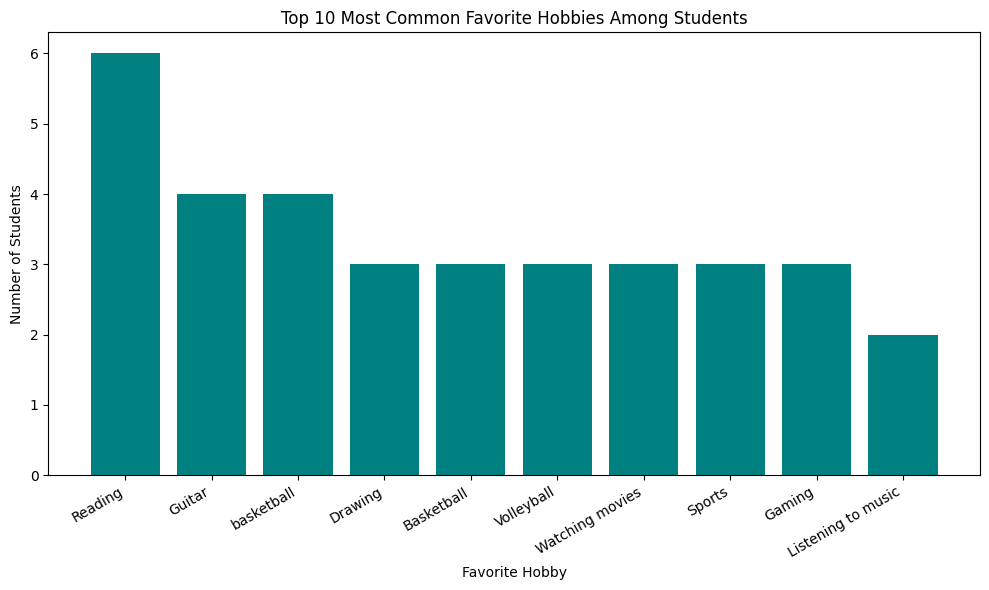

In [16]:
import matplotlib.pyplot as plt

#showing top 10 hobbies only
top_n = 10
df_top = df.sort_values("COUNT", ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(df_top["HOBBY"], df_top["COUNT"], color="teal")
plt.xlabel("Favorite Hobby")
plt.ylabel("Number of Students")
plt.title(f"Top {top_n} Most Common Favorite Hobbies Among Students")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


### What is the distribution of sleep preferences ("early bird" vs "night owl") by current academic standing?

In [17]:
#q16
with open("snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='awaria31',
    password=password,
    account='PXYRLSQ-SZ74217',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA',
    role='P4_ROLE'
)
query = """
SELECT
    WHAT_IS_YOUR_CURRENT_STANDING AS standing,
    WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_ AS sleep_type,
    COUNT(*) AS student_count
FROM SURVEY
GROUP BY standing, sleep_type
ORDER BY standing, sleep_type
"""
df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/1908194032.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,STANDING,SLEEP_TYPE,STUDENT_COUNT
0,Grad,early bird,7
1,Grad,night owl,8
2,Grad,no preference,4
3,Junior,early bird,7
4,Junior,night owl,38
5,Junior,no preference,5
6,Senior,early bird,14
7,Senior,night owl,40
8,Senior,no preference,13
9,Sophomore,early bird,5


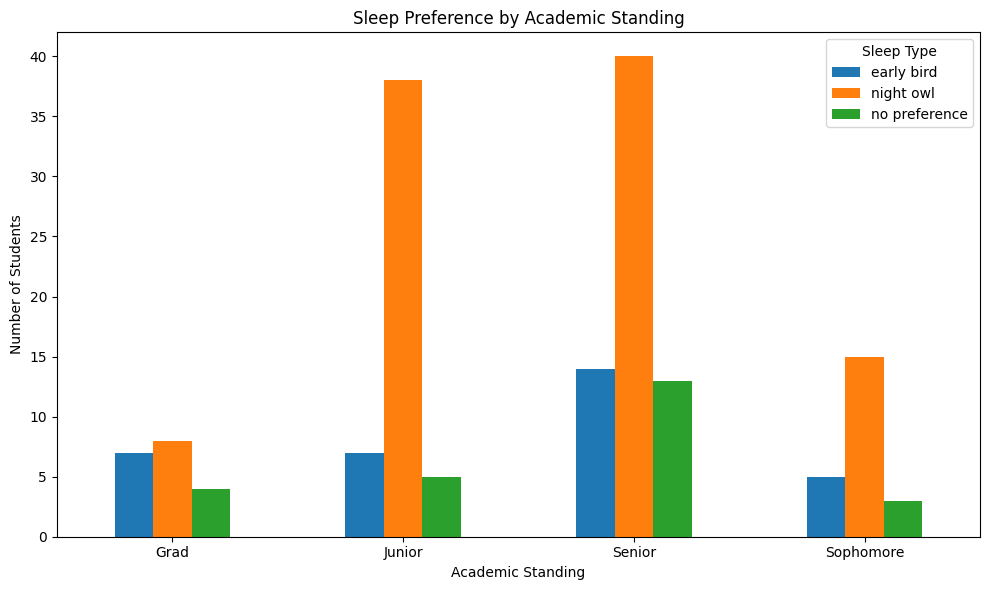

In [18]:
pivot_df = df.pivot(index="STANDING", columns="SLEEP_TYPE", values="STUDENT_COUNT").fillna(0)

pivot_df.plot(kind="bar", figsize=(10, 6))
plt.title("Sleep Preference by Academic Standing")
plt.xlabel("Academic Standing")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(title="Sleep Type")
plt.tight_layout()
plt.show()

### Configure ~/.dbt/profiles.yml for STOCK_DB

In [19]:
!grep -v 'password' ~/.dbt/profiles.yml

p4_data_pipeline:
  target: dev
  outputs:
    dev:
      type: snowflake
      account: PXYRLSQ-SZ74217
      user: AWARIA31
      role: P4_ROLE
      database: SURVEY_DATABASE
      warehouse: COMPUTE_WH
      schema: SURVEY_SCHEMA

    stock_db:
      type: snowflake
      account: PXYRLSQ-SZ74217
      user: AWARIA31
      role: P4_ROLE
      database: STOCK_TRACKING_US_STOCK_PRICES_BY_DAY
      warehouse: COMPUTE_WH
      schema: STOCK


In [20]:
%cd ~/p4_data_pipeline


/home/anyawaria/p4_data_pipeline


/home/anyawaria/p4/ENTER/envs/p4-env/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/anyawaria/p4/ENTER/envs/p4-env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [21]:
!ls models/staging/

sources.yml		      staging_valid_stock_info.sql
staging_valid_fx_info.sql     staging_valid_stock_tickers.sql
staging_valid_fx_tickers.sql  transform_survey.sql


In [22]:
!cat models/staging/transform_survey.sql

{{ config(materialized='view') }}

SELECT
    "TIMESTAMP",
    "EMAIL_ADDRESS" AS email_address,
    "WHAT_IS_YOUR_AGE_" AS age,
    "WHICH_BEST_DESCRIBES_YOUR_PRIMARY_MAJOR_OR_FIELD_OF_STUDY_IF_YOU_HAVE_MORE_THAN_ONE_MAJOR_PLEASE_SPECIFY_OTHER_MAJORS_AS_PART_OF_THE_NEXT_QUESTION_" AS primary_major,
    "IF_YOU_HAVE_SECONDARY_MAJORS_PLEASE_LIST_THEM_HERE_SEPARATED_BY_A_COMMA_" AS secondary_majors,
    "WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_" AS course_selection_factor,
    "WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_" AS zip_code,
    "WHAT_IS_YOUR_FAVORITE_PIZZA_TOPPING_" AS favorite_pizza_topping,
    "HAVE_YOU_EVER_IN_YOUR_LIFE_HAD_A_PET_" AS had_pet,
    "ARE_YOU_A_RUNNER_CONSIDER_BOTH_RUNNING_ON_TREADMILL_AND_OUTDOORS_" AS is_runner,
    "WOULD_YOU_DESCRIBE_YOURSELF_AS_AN_EARLY_BIRD_OR_A_NIGHT_OWL_" AS sleep_preference,
    "DO_YOU_CONSIDER_YOURSELF_A_PROCR

### Update models/schema.yml file to include a second source for STOCK_DB tables (0.5 points)

In [23]:
!cat models/schema.yml

version: 2

sources:
  - name: airbyte_csv_data
    database: SURVEY_DATABASE
    schema: SURVEY_SCHEMA
    tables:
      - name: TRADING_BOOKS
      - name: WEIGHTS_TABLE

  - name: stock_by_day
    database: STOCK_TRACKING_US_STOCK_PRICES_BY_DAY
    schema: STOCK
    tables:
      - name: US_STOCK_METRICS

  - name: fx_by_day
    database: FOREX_TRACKING_CURRENCY_EXCHANGE_RATES_BY_DAY
    schema: STOCK
    tables:
      - name: FOREX_METRICS


### Create dbt_project.yml file in your dbt project directory --- p4_data_pipeline

In [24]:
!cat dbt_project.yml

name: 'p4_data_pipeline'
version: '1.0.0'

profile: 'p4_data_pipeline'

model-paths: ["models"]
analysis-paths: ["analyses"]
test-paths: ["tests"]
seed-paths: ["seeds"]
macro-paths: ["macros"]
snapshot-paths: ["snapshots"]

clean-targets:
  - "target"
  - "dbt_packages"

models:
  p4_data_pipeline:
    staging:
      +materialized: view
      +warehouse: P4_WAREHOUSE
    marts:
      +materialized: table
      +warehouse: P4_WAREHOUSE


### Creating staging tables for FX and Stock

In [25]:
import snowflake.connector
import pandas as pd

with open("../p4/snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='AWARIA31',
    password=password,
    account='PXYRLSQ-SZ74217',
    role='P4_ROLE'
)

conn.cursor().execute("USE WAREHOUSE P4_WAREHOUSE;")
conn.cursor().execute("USE DATABASE SURVEY_DATABASE;")
conn.cursor().execute("USE SCHEMA SURVEY_SCHEMA;")

views = [
    "STAGING_VALID_FX_TICKERS",
    "STAGING_VALID_STOCK_TICKERS",
    "STAGING_VALID_FX_INFO",
    "STAGING_VALID_STOCK_INFO"
]

for view in views:
    try:
        #Preview only 10 rows to avoid crashing
        df = pd.read_sql(f'SELECT * FROM "{view}" LIMIT 10;', conn)
        display(df) 
    except Exception as e:
        print(f" Failed to preview {view} — {e}")

/tmp/ipykernel_3153306/3611503144.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM "{view}" LIMIT 10;', conn)


,CURRENCY_PAIR_NAME
0,AED/BHD
1,ARS/CLP
2,AED/SEK
3,AUD/NPR
4,AUD/THB
5,AUD/KES
6,ARS/CNY
7,INR/DKK
8,NZD/JMD
9,INR/EGP


/tmp/ipykernel_3153306/3611503144.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM "{view}" LIMIT 10;', conn)


,TICKER
0,AAPL
1,EUR/USD
2,MSFT
3,GBP/USD
4,GOOGL


/tmp/ipykernel_3153306/3611503144.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM "{view}" LIMIT 10;', conn)


,RUN_DATE,CURRENCY_PAIR_NAME,OPEN_PRICE,CLOSE_PRICE,HIGH_PRICE,LOW_PRICE
0,2025-04-04,EUR/ISK,144.30000,144.89000,144.92000,144.10001
1,2025-04-04,PLN/JOD,0.18477,0.18166,0.18620,0.18134
2,2025-04-04,AUD/LBP,141784.51562,147821.65625,149107.21875,141426.31250
3,2025-04-04,ARS/BRL,0.00525,0.00544,0.00544,0.00524
4,2025-04-04,CZK/JPY,6.43339,6.36636,6.45936,6.31296
5,2025-04-04,TRY/BRL,0.14824,0.15376,0.15397,0.14784
6,2025-04-04,BRL/USD,0.17753,0.17139,0.17784,0.17108
7,2025-04-04,GBP/FJD,3.02978,3.01702,3.03321,3.01702
8,2025-04-04,EUR/TZS,2950.80005,2950.80005,2950.80005,2950.80005
9,2025-04-04,ZAR/NAD,0.99950,0.99415,1.00625,0.98526


/tmp/ipykernel_3153306/3611503144.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM "{view}" LIMIT 10;', conn)


,TRADE_DATE,TICKER,OPEN_PRICE,CLOSE_PRICE,HIGH_PRICE,LOW_PRICE
0,2024-03-01,AAPL,175.500,175.500,175.500,175.500
1,2024-03-01,AAPL,178.250,178.250,178.250,178.250
2,2024-03-01,EUR/USD,1.085,1.085,1.085,1.085
3,2024-03-01,EUR/USD,1.092,1.092,1.092,1.092
4,2024-03-01,MSFT,405.750,405.750,405.750,405.750
5,2024-03-01,MSFT,408.500,408.500,408.500,408.500
6,2024-03-01,GBP/USD,1.265,1.265,1.265,1.265
7,2024-03-01,GBP/USD,1.272,1.272,1.272,1.272
8,2024-03-01,GOOGL,141.250,141.250,141.250,141.250
9,2024-03-01,GOOGL,142.500,142.500,142.500,142.500


In [27]:
query = 'SELECT * FROM "STAGING_VALID_FX_INFO" LIMIT 10;'
df = pd.read_sql(query, conn)
df.head()


/tmp/ipykernel_3153306/3096246565.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,RUN_DATE,CURRENCY_PAIR_NAME,OPEN_PRICE,CLOSE_PRICE,HIGH_PRICE,LOW_PRICE
0,2025-04-04,EUR/ISK,144.30000,144.89000,144.92000,144.10001
1,2025-04-04,PLN/JOD,0.18477,0.18166,0.18620,0.18134
2,2025-04-04,AUD/LBP,141784.51562,147821.65625,149107.21875,141426.31250
3,2025-04-04,ARS/BRL,0.00525,0.00544,0.00544,0.00524
4,2025-04-04,CZK/JPY,6.43339,6.36636,6.45936,6.31296


In [28]:
query = 'SELECT * FROM "STAGING_VALID_STOCK_INFO" LIMIT 10;'
df = pd.read_sql(query, conn)
df.head()


/tmp/ipykernel_3153306/4174828599.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TRADE_DATE,TICKER,OPEN_PRICE,CLOSE_PRICE,HIGH_PRICE,LOW_PRICE
0,2024-03-01,AAPL,175.500,175.500,175.500,175.500
1,2024-03-01,AAPL,178.250,178.250,178.250,178.250
2,2024-03-01,EUR/USD,1.085,1.085,1.085,1.085
3,2024-03-01,EUR/USD,1.092,1.092,1.092,1.092
4,2024-03-01,MSFT,405.750,405.750,405.750,405.750


In [67]:
import pandas as pd

def export_limited_view(view_name, output_path, row_limit=100):
    query = f'SELECT * FROM "{view_name}" LIMIT {row_limit}' 
    try:
        df = pd.read_sql(query, conn)
        df.to_csv(output_path, index=False)
        print(f" Exported first {row_limit} rows from {view_name} to {output_path}")
    except Exception as e:
        print(f" Failed to export {view_name} — {e}")

export_limited_view("STAGING_VALID_FX_INFO", "/home/anyawaria/p4/files/staging_valid_fx_info.csv")

export_limited_view("STAGING_VALID_STOCK_INFO", "/home/anyawaria/p4/files/staging_valid_stock_info.csv")


/tmp/ipykernel_3153306/3215328036.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


 Exported first 100 rows from STAGING_VALID_FX_INFO to /home/anyawaria/p4/files/staging_valid_fx_info.csv
 Exported first 100 rows from STAGING_VALID_STOCK_INFO to /home/anyawaria/p4/files/staging_valid_stock_info.csv


In [31]:
!cat models/staging/staging_valid_fx_tickers.sql
!cat models/staging/staging_valid_stock_tickers.sql
!cat models/staging/staging_valid_fx_info.sql
!cat models/staging/staging_valid_stock_info.sql

{{ config(materialized='view') }}

SELECT DISTINCT currency_pair_name
FROM {{ source('fx_by_day', 'FOREX_METRICS') }}
WHERE currency_pair_name IS NOT NULL
{{ config(materialized='view') }}

SELECT DISTINCT ticker
FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }}
WHERE ticker IS NOT NULL
{{ config(materialized='view') }}

SELECT 
    f.run_date,
    f.currency_pair_name,
    f.open AS open_price,
    f.close AS close_price,
    f.high AS high_price,
    f.low AS low_price
FROM {{ source('fx_by_day', 'FOREX_METRICS') }} f
JOIN {{ ref('staging_valid_fx_tickers') }} t
  ON f.currency_pair_name = t.currency_pair_name
{{ config(materialized='view') }}

SELECT 
    s.trade_date,
    s.ticker,
    s.price AS open_price,   -- All prices are approximated from `price`
    s.price AS close_price,
    s.price AS high_price,
    s.price AS low_price
FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }} s
JOIN {{ ref('staging_valid_stock_tickers') }} t
  ON s.ticker = t.ticker


### Create staging table for trading pairs

In [46]:
import pandas as pd

query = 'SELECT * FROM "STAGING_BUY_SELL_JOINT" LIMIT 1000;'
df = pd.read_sql(query, conn)
df.to_csv("/home/anyawaria/p4/files/staging_buy_sell_joint.csv", index=False)
print("Exported staging_buy_sell_joint.csv")


/tmp/ipykernel_3153306/150112377.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Exported staging_buy_sell_joint.csv


In [47]:
!cat models/staging/staging_buy_sell_joint.sql

{{ config(materialized='view') }}

WITH buys AS (
    SELECT
        trade_id AS trade_id_buy,
        trade_date,
        trader_name,
        desk,
        ticker,
        quantity AS quantity_buy,
        price AS price_buy
    FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }}
    WHERE TRADE_TYPE = 'BUY'
),

sells AS (
    SELECT
        trade_date,
        trader_name,
        ticker,
        quantity AS quantity_sell,
        price AS price_sell
    FROM {{ source('airbyte_csv_data', 'TRADING_BOOKS') }}
    WHERE TRADE_TYPE = 'SELL'
)

SELECT
    b.trade_id_buy,
    b.trade_date,
    b.trader_name,
    b.desk,
    b.ticker,
    b.quantity_buy,
    b.price_buy,
    s.quantity_sell,
    s.price_sell
FROM buys b
JOIN sells s
  ON b.trader_name = s.trader_name
 AND b.trade_date = s.trade_date
 AND b.ticker = s.ticker
ORDER BY b.trade_id_buy


### Create a fact Table for trading data

In [50]:
!cat models/marts/fact_tab_trading.sql

{{ config(materialized='table') }}

SELECT
    trade_id_buy AS trade_id,
    quantity_buy * price_buy AS buy_money,
    quantity_sell * price_sell AS sell_money,
    (quantity_sell * price_sell) - (quantity_buy * price_buy) AS profit
FROM {{ ref('staging_buy_sell_joint') }}
ORDER BY trade_id_buy


In [51]:
import pandas as pd
import snowflake.connector

with open("../p4/snowflake_password.txt") as f:
    password = f.read().strip()

conn = snowflake.connector.connect(
    user='AWARIA31',
    password=password,
    account='PXYRLSQ-SZ74217',
    role='P4_ROLE',
    warehouse='P4_WAREHOUSE',
    database='SURVEY_DATABASE',
    schema='SURVEY_SCHEMA'
)

df = pd.read_sql('SELECT * FROM "FACT_TAB_TRADING";', conn)
df.to_csv("/home/anyawaria/p4/files/fact_tab_trading.csv", index=False)
print("Exported fact_tab_trading.csv")


/tmp/ipykernel_3153306/660646543.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM "FACT_TAB_TRADING";', conn)


Exported fact_tab_trading.csv


### Compute total profit by desk

In [57]:
query = """
SELECT
    b.desk,
    SUM(f.profit) AS total_profit
FROM SURVEY_SCHEMA.TRADING_BOOKS b
JOIN SURVEY_SCHEMA.FACT_TAB_TRADING f
    ON b.trade_id = f.trade_id
WHERE UPPER(b.trade_type) = 'BUY'
GROUP BY b.desk
ORDER BY b.desk;
"""

df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/1874234970.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,DESK,TOTAL_PROFIT
0,Equity Desk,2718.75
1,FX Desk,5000.00


### Compute profit rate by desk 

In [58]:
query = """
SELECT
  b.desk,
  SUM(f.sell_money - f.buy_money) / NULLIF(SUM(f.buy_money), 0) AS profit_rate
FROM SURVEY_SCHEMA.TRADING_BOOKS b
JOIN SURVEY_SCHEMA.FACT_TAB_TRADING f
  ON b.trade_id = f.trade_id
WHERE UPPER(b.trade_type) = 'BUY'
GROUP BY b.desk
ORDER BY b.desk;
"""
df = pd.read_sql(query, conn)
df

/tmp/ipykernel_3153306/2706376438.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,DESK,PROFIT_RATE
0,Equity Desk,0.012701
1,FX Desk,0.006342
